In [1]:
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

In [10]:
x_train = pd.read_excel("x_train.xlsx")
x_test = pd.read_excel("x_test.xlsx")
y_train = pd.read_excel("y_train.xlsx")
y_test = pd.read_excel("y_test.xlsx")

In [4]:
df = pd.read_excel('data.xlsx')
df

Index  Folder  Water_COG_mean_x  Water_COG_mean_y  Water_COG_mean_z  \
0        1     101         15.513189          4.172128          5.988437   
1        2     102         15.512776          4.171888          5.987745   
2        3     103         15.512172          4.171872          5.986930   
3        4     104         15.511369          4.172147          5.986027   
4        5     106         15.509439          4.173445          5.983983   
..     ...     ...               ...               ...               ...   
195    196     418         15.457806          4.214043          5.963557   
196    197     421         15.460246          4.213016          5.962805   
197    198     422         15.461044          4.212664          5.962515   
198    199     423         15.461743          4.212282          5.962230   
199    200     426         15.462807          4.211819          5.961673   

     Water_COG_std  Min_OH_distance  Mean_OH_distance  Total_Dipole_X  \
0         5.316940         1.394318          3.681569      -58.170267   
1         5.316935         1.399825          3.677396      -58.721219   
2         5.316999         1.407605          3.675636      -59.647850   
3         5.317122         1.416639          3.672192      -60.965782   
4         5.317542         1.419631          3.674349      -64.237249   
..             ...              ...               ...             ...   
195       5.420884         1.418724          3.688937      -76.099725   
196       5.421586         1.432560          3.692152      -70.921876   
197       5.422023         1.443374          3.692606      -69.233454   
198       5.422468         1.458080          3.692469      -67.746007   
199       5.423364         1.391115          3.689963      -65.344064   

     Total_Dipole_Y  Total_Dipole_Z  Total_Dipole_Mag  Mean_Water_Dipole  \
0        -46.821429       62.096560         97.118530           5.856089   
1        -47.651158       60.818393         97.044791           5.855443   
2        -48.040597       59.287953         96.854666           5.854344   
3        -47.859905       57.574866         96.551863           5.854532   
4        -46.029380       53.646936         95.515034           5.863288   
..              ...             ...               ...                ...   
195      -81.373860        4.370681        111.498772           5.806751   
196      -85.055506        5.055641        110.859872           5.821864   
197      -86.297259        5.206822        110.759194           5.823274   
198      -87.595268        5.369473        110.866062           5.823046   
199      -90.127335        6.447701        111.509443           5.819183   

     Std_Water_Dipole  Mean_Water_Dipole_Angle  Std_Water_Dipole_Angle  \
0            0.376726                83.504718               36.865957   
1            0.388974                83.679508               36.894454   
2            0.393025                83.885826               36.920728   
3            0.386750                84.116911               36.943356   
4            0.347990                84.640547               37.003124   
..                ...                      ...                     ...   
195          0.395826                89.556295               35.963012   
196          0.380113                89.355944               35.969622   
197          0.366934                89.292457               35.961260   
198          0.354469                89.216819               35.968981   
199          0.368081                88.908966               36.148854   

     Num_OH_contacts  Bandgap  
0               2294   0.3670  
1               2286   0.3764  
2               2282   0.3838  
3               2275   0.3868  
4               2276   0.3789  
..               ...      ...  
195             2182   0.3603  
196             2188   0.3250  
197             2189   0.3029  
198             2189   0.2816  
199             2186   0.2477  

[200 rows x 18 columns]

In [5]:
df2 = df.sample(frac=1, random_state=42).reset_index(drop=True)
df2

Index  Folder  Water_COG_mean_x  Water_COG_mean_y  Water_COG_mean_z  \
0       96     246         15.481852          4.181527          5.981119   
1       16     129         15.501381          4.171087          5.969680   
2       31     156         15.509603          4.171519          5.979191   
3      159     361         15.463077          4.202028          5.965045   
4      129     306         15.454118          4.196139          5.960057   
..     ...     ...               ...               ...               ...   
195    107     270         15.467421          4.186498          5.966826   
196     15     128         15.501237          4.171980          5.969630   
197     93     241         15.486869          4.178244          5.984682   
198    180     394         15.463680          4.205803          5.965774   
199    103     259         15.464988          4.189141          5.970050   

     Water_COG_std  Min_OH_distance  Mean_OH_distance  Total_Dipole_X  \
0         5.349306         1.317104          3.688168      -66.448757   
1         5.326952         1.418753          3.664352      -73.677023   
2         5.329305         1.425454          3.681018      -48.792203   
3         5.380883         1.325909          3.687828      -76.867974   
4         5.376516         1.372149          3.688132      -97.874552   
..             ...              ...               ...             ...   
195       5.366518         1.442189          3.684615      -84.314295   
196       5.325995         1.407537          3.665833      -74.274878   
197       5.346111         1.294786          3.685461      -58.875161   
198       5.411397         1.442772          3.688438      -68.492247   
199       5.359685         1.386627          3.686103      -93.807165   

     Total_Dipole_Y  Total_Dipole_Z  Total_Dipole_Mag  Mean_Water_Dipole  \
0        -69.611096       42.035343        105.014819           5.799244   
1        -59.546073       22.440734         97.353094           5.866757   
2        -68.970152       27.382366         88.810781           5.856206   
3        -68.465580       -9.400529        103.366295           5.811693   
4        -72.165426      -14.417308        122.454626           5.807917   
..              ...             ...               ...                ...   
195      -70.240196       13.490025        110.564760           5.825082   
196      -57.365461       22.650206         96.543179           5.865100   
197      -74.326488       48.161403        106.349575           5.791097   
198      -83.720489       -6.454834        108.360385           5.800352   
199      -59.892994       21.069745        113.273515           5.831062   

     Std_Water_Dipole  Mean_Water_Dipole_Angle  Std_Water_Dipole_Angle  \
0            0.395367                86.085415               37.426531   
1            0.303646                88.159028               37.359427   
2            0.313661                87.014217               37.011808   
3            0.386105                91.072305               35.969704   
4            0.414558                92.152997               35.519219   
..                ...                      ...                     ...   
195          0.427255                89.281654               39.543453   
196          0.316255                88.216859               37.427625   
197          0.350169                85.517305               37.434783   
198          0.360952                91.376168               35.503649   
199          0.369436                88.439599               37.750820   

     Num_OH_contacts  Bandgap  
0               2255   0.2552  
1               2246   0.2248  
2               2276   0.1843  
3               2216   0.2279  
4               2221   0.3080  
..               ...      ...  
195             2235   0.2925  
196             2250   0.2455  
197             2249   0.2999  
198             2178   0.3969  
199             2246   0.2516  

[200 rows x 18 columns]

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
x = df2.iloc[:, 2:-1]  # exclude first and last columns
x

Water_COG_mean_x  Water_COG_mean_y  Water_COG_mean_z  Water_COG_std  \
0           15.481852          4.181527          5.981119       5.349306   
1           15.501381          4.171087          5.969680       5.326952   
2           15.509603          4.171519          5.979191       5.329305   
3           15.463077          4.202028          5.965045       5.380883   
4           15.454118          4.196139          5.960057       5.376516   
..                ...               ...               ...            ...   
195         15.467421          4.186498          5.966826       5.366518   
196         15.501237          4.171980          5.969630       5.325995   
197         15.486869          4.178244          5.984682       5.346111   
198         15.463680          4.205803          5.965774       5.411397   
199         15.464988          4.189141          5.970050       5.359685   

     Min_OH_distance  Mean_OH_distance  Total_Dipole_X  Total_Dipole_Y  \
0           1.317104          3.688168      -66.448757      -69.611096   
1           1.418753          3.664352      -73.677023      -59.546073   
2           1.425454          3.681018      -48.792203      -68.970152   
3           1.325909          3.687828      -76.867974      -68.465580   
4           1.372149          3.688132      -97.874552      -72.165426   
..               ...               ...             ...             ...   
195         1.442189          3.684615      -84.314295      -70.240196   
196         1.407537          3.665833      -74.274878      -57.365461   
197         1.294786          3.685461      -58.875161      -74.326488   
198         1.442772          3.688438      -68.492247      -83.720489   
199         1.386627          3.686103      -93.807165      -59.892994   

     Total_Dipole_Z  Total_Dipole_Mag  Mean_Water_Dipole  Std_Water_Dipole  \
0         42.035343        105.014819           5.799244          0.395367   
1         22.440734         97.353094           5.866757          0.303646   
2         27.382366         88.810781           5.856206          0.313661   
3         -9.400529        103.366295           5.811693          0.386105   
4        -14.417308        122.454626           5.807917          0.414558   
..              ...               ...                ...               ...   
195       13.490025        110.564760           5.825082          0.427255   
196       22.650206         96.543179           5.865100          0.316255   
197       48.161403        106.349575           5.791097          0.350169   
198       -6.454834        108.360385           5.800352          0.360952   
199       21.069745        113.273515           5.831062          0.369436   

     Mean_Water_Dipole_Angle  Std_Water_Dipole_Angle  Num_OH_contacts  
0                  86.085415               37.426531             2255  
1                  88.159028               37.359427             2246  
2                  87.014217               37.011808             2276  
3                  91.072305               35.969704             2216  
4                  92.152997               35.519219             2221  
..                       ...                     ...              ...  
195                89.281654               39.543453             2235  
196                88.216859               37.427625             2250  
197                85.517305               37.434783             2249  
198                91.376168               35.503649             2178  
199                88.439599               37.750820             2246  

[200 rows x 15 columns]

In [7]:
df2.columns = df2.columns.str.strip()
y = df2['Bandgap']
y

0      0.2552
1      0.2248
2      0.1843
3      0.2279
4      0.3080
        ...  
195    0.2925
196    0.2455
197    0.2999
198    0.3969
199    0.2516
Name: Bandgap, Length: 200, dtype: float64

# **Histogram**

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [7]:
x_train.to_excel('x_train.xlsx')
y_train.to_excel('y_train.xlsx')
x_test.to_excel('x_test.xlsx')
y_test.to_excel('y_test.xlsx')

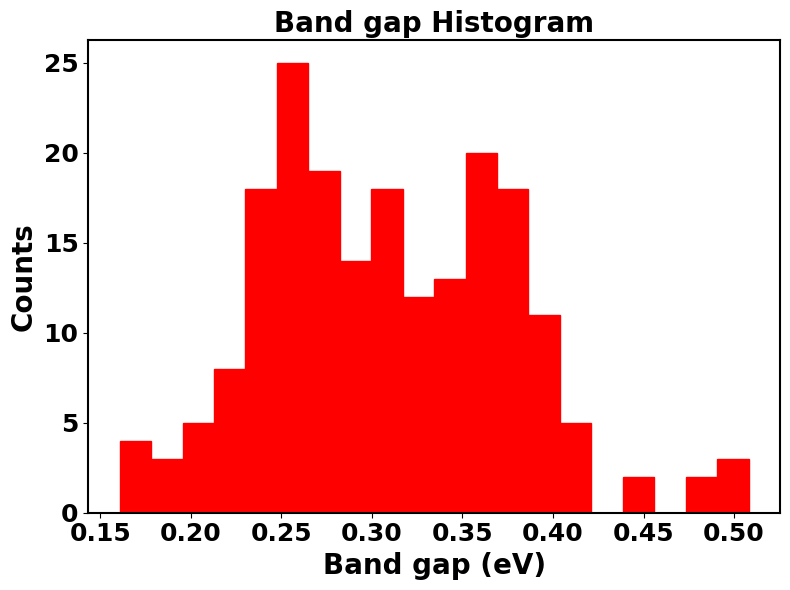

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df2["Bandgap"].dropna(), bins=20, edgecolor='red', color='red')  # red fill and red border

plt.title("Band gap Histogram", fontsize=20, fontweight='bold')
plt.xlabel("Band gap (eV)", fontsize=20, fontweight='bold')
plt.ylabel("Counts", fontsize=20, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold', visible=True)  # ensure x ticks visible
plt.yticks(fontsize=18, fontweight='bold', visible=True)  # ensure y ticks visible

#plt.xlim(0.16, 0.42)  # Set x-axis limits

plt.grid(False)  # Turn off grid

# Set black border for all 4 axes spines
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()


# **Data Split**

# **Pearson Heatmap**

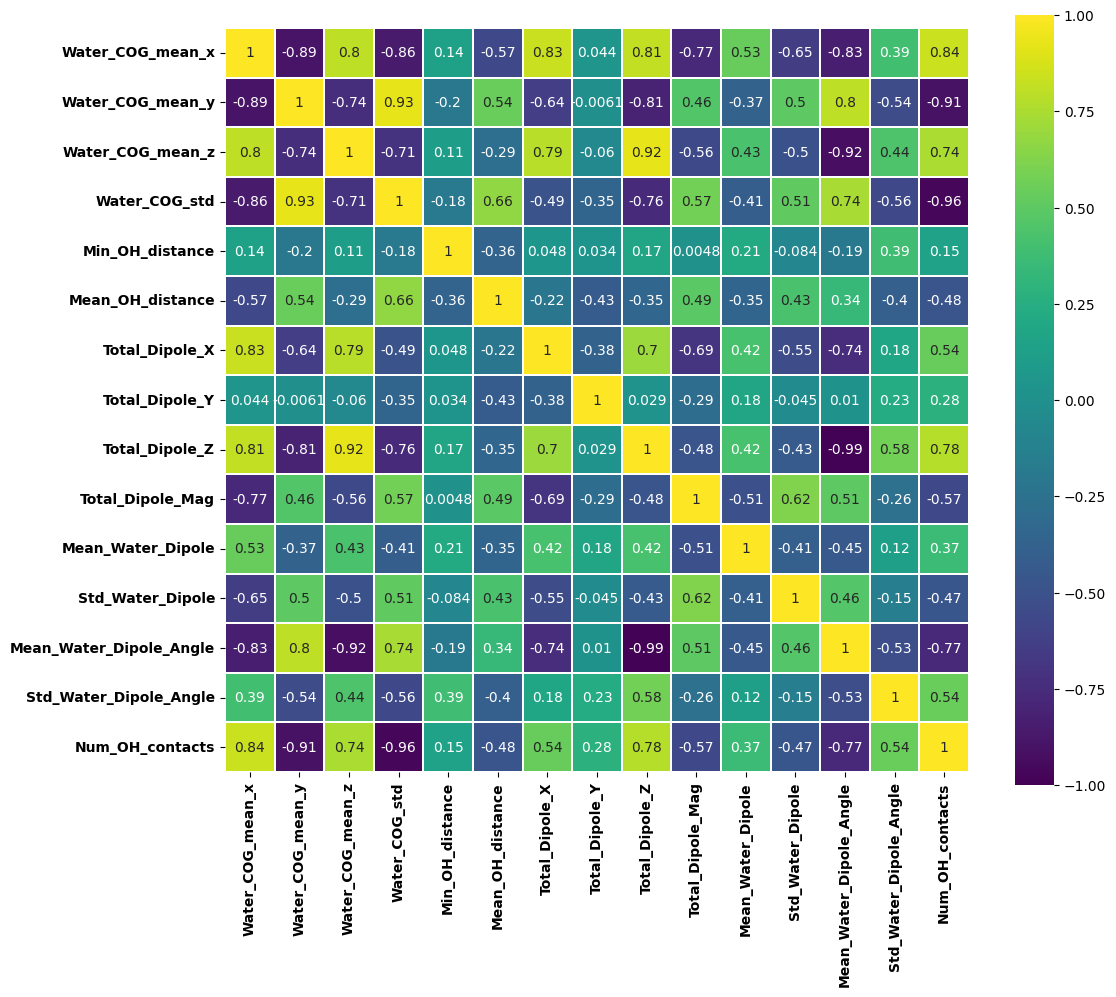

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = x.corr()

plt.figure(figsize=(12, 10))
plt.gcf().patch.set_facecolor('white')  # Set white background
plt.xticks(weight='bold', fontsize=10)
plt.yticks(weight='bold', fontsize=10)
plt.rcParams['figure.dpi'] = 1200

sns.heatmap(corr,
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True,   # No numbers
            square=True)

plt.show()


# **Spearman Heatmap**

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Spearman correlation matrix
corr = x_train.corr(method='spearman')

plt.figure(figsize=(12, 10))
plt.gcf().patch.set_facecolor('white')  # Set white background
plt.xticks(weight='bold', fontsize=15)
plt.yticks(weight='bold', fontsize=15)
plt.rcParams['figure.dpi'] = 1200

sns.heatmap(corr,
            cmap='magma', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True,
            annot_kws={"size": 15},# No numbers
            square=True)

plt.show()


# **GPR Tuning**

In [28]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from sklearn.metrics import mean_squared_error, r2_score
import math

# Kernel: Constant * RBF + WhiteKernel (noise)
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e1))

# Create model with optimization and normalization
GPR_model = GaussianProcessRegressor(
    kernel=kernel,
    alpha=1e-6,                # small regularization
    normalize_y=True,           # normalize target
    n_restarts_optimizer=10,   # multiple restarts to find best hyperparams
    random_state=42
)

# Fit model
GPR_model.fit(x_train, y_train)

# Predictions
GPR_pred_train = GPR_model.predict(x_train)
GPR_pred_test = GPR_model.predict(x_test)

# Metrics
GPR_rmse_train = math.sqrt(mean_squared_error(y_train, GPR_pred_train))
GPR_rmse_test = math.sqrt(mean_squared_error(y_test, GPR_pred_test))
GPR_r2_train = r2_score(y_train, GPR_pred_train)
GPR_r2_test = r2_score(y_test, GPR_pred_test)

# Print
print("GPR Train RMSE:", GPR_rmse_train)
print("GPR Test RMSE :", GPR_rmse_test)
print("GPR Train R²  :", GPR_r2_train)
print("GPR Test R²   :", GPR_r2_test)
print("Optimized Kernel:", GPR_model.kernel_)


GPR Train RMSE: 1.203531838261907e-05
GPR Test RMSE : 0.0037886145176555357
GPR Train R²  : 0.9999999693736349
GPR Test R²   : 0.9967334364245425
Optimized Kernel: 4.16**2 * RBF(length_scale=9.48) + WhiteKernel(noise_level=1e-10)


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-10. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


# **GPR BEFORE RFE**

In [11]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# Define kernel (use your optimized one if known)
kernel = 4.16**2 * RBF(length_scale=9.48) + WhiteKernel(noise_level=1e-10)

# Create GPR model
GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, normalize_y=True, random_state=42)

# Fit model
GPR_model.fit(x_train, y_train)

# Predict Train & Test
GPR_pred_train = GPR_model.predict(x_train)
GPR_pred_test  = GPR_model.predict(x_test)

# Metrics
GPR_rmse_train = math.sqrt(mean_squared_error(y_train, GPR_pred_train))
GPR_rmse_test  = math.sqrt(mean_squared_error(y_test, GPR_pred_test))

GPR_r2_train = r2_score(y_train, GPR_pred_train)
GPR_r2_test  = r2_score(y_test, GPR_pred_test)

# Print
print("GPR Train RMSE:", GPR_rmse_train)
print("GPR Test RMSE :", GPR_rmse_test)

print("GPR Train R²  :", GPR_r2_train)
print("GPR Test R²   :", GPR_r2_test)


GPR Train RMSE: 1.5922323589994106e-05
GPR Test RMSE : 0.00919905040447601
GPR Train R²  : 0.999999946396496
GPR Test R²   : 0.9807417742268861


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


# **GPR**

In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# Define kernel (use your optimized one if known)
kernel = 4.16**2 * RBF(length_scale=9.48) + WhiteKernel(noise_level=1e-10)

# Create GPR model
GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, normalize_y=True, random_state=42)

# Fit model
GPR_model.fit(x_train, y_train)

# Predict Train & Test
GPR_pred_train = GPR_model.predict(x_train)
GPR_pred_test  = GPR_model.predict(x_test)

# Metrics
GPR_rmse_train = math.sqrt(mean_squared_error(y_train, GPR_pred_train))
GPR_rmse_test  = math.sqrt(mean_squared_error(y_test, GPR_pred_test))

GPR_r2_train = r2_score(y_train, GPR_pred_train)
GPR_r2_test  = r2_score(y_test, GPR_pred_test)

# Print
print("GPR Train RMSE:", GPR_rmse_train)
print("GPR Test RMSE :", GPR_rmse_test)

print("GPR Train R²  :", GPR_r2_train)
print("GPR Test R²   :", GPR_r2_test)


GPR Train RMSE: 6.587196073624577e-05
GPR Test RMSE : 0.0028370273937376395
GPR Train R²  : 0.9999990825519762
GPR Test R²   : 0.998168287389352


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


# GPR RFE **5**

In [22]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, r2_score
import math

# --- Your train/test data ---
# x_train, x_test: pandas DataFrames or numpy arrays
# y_train, y_test: target arrays

# --- Define kernel ---
kernel = 1.27**2 * RBF(length_scale=11.4) + WhiteKernel(noise_level=1e-10)

def train_gpr(X_train, y_train, X_test, y_test, alpha=1e-4):
    """Train GPR and return predictions and metrics."""
    model = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, normalize_y=True, random_state=42)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)

    rmse_train = math.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test  = math.sqrt(mean_squared_error(y_test, y_pred_test))

    r2_train = r2_score(y_train, y_pred_train)
    r2_test  = r2_score(y_test, y_pred_test)

    return model, rmse_train, rmse_test, r2_train, r2_test

# --- Greedy Recursive Feature Elimination ---
def greedy_feature_elimination(x_train, y_train, x_test, y_test, min_features=5):
    """
    Perform greedy RFE: iteratively remove the feature whose removal
    improves or least worsens test RMSE.
    """
    remaining_features = list(x_train.columns)
    history = []

    while len(remaining_features) > min_features:
        rmse_results = []
        # Test removing each feature
        for feature in remaining_features:
            features_subset = [f for f in remaining_features if f != feature]
            _, _, rmse_test, _, _ = train_gpr(
                x_train[features_subset], y_train,
                x_test[features_subset], y_test
            )
            rmse_results.append((feature, rmse_test))

        # Find feature whose removal gives lowest test RMSE
        rmse_results.sort(key=lambda x: x[1])
        worst_feature, best_rmse = rmse_results[0]  # feature to remove

        # Remove it
        remaining_features.remove(worst_feature)
        history.append({
            "Removed_Feature": worst_feature,
            "Remaining_Features": remaining_features.copy(),
            "Test_RMSE": best_rmse
        })
        print(f"Removed: {worst_feature}, Test RMSE: {best_rmse:.4f}, Features left: {len(remaining_features)}")

    return remaining_features, history

# --- Example usage ---
final_features, elimination_history = greedy_feature_elimination(x_train, y_train, x_test, y_test, min_features=5)

# Train final GPR model with selected features
final_model, rmse_train, rmse_test, r2_train, r2_test = train_gpr(
    x_train[final_features], y_train,
    x_test[final_features], y_test
)

print("\nFinal selected features:", final_features)
print("Final Train RMSE:", rmse_train)
print("Final Test RMSE :", rmse_test)
print("Final Train R²  :", r2_train)
print("Final Test R²   :", r2_test)


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning:

Removed: Num_OH_contacts, Test RMSE: 0.0035, Features left: 14


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning:

Removed: Total_Dipole_X, Test RMSE: 0.0026, Features left: 13


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning:

Removed: Water_COG_mean_y, Test RMSE: 0.0026, Features left: 12


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kerne

Removed: Water_COG_mean_x, Test RMSE: 0.0026, Features left: 11


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning:

Removed: Water_COG_mean_z, Test RMSE: 0.0026, Features left: 10


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning:

Removed: Water_COG_std, Test RMSE: 0.0026, Features left: 9


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWar

Removed: Mean_Water_Dipole, Test RMSE: 0.0026, Features left: 8


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWar

Removed: Mean_OH_distance, Test RMSE: 0.0026, Features left: 7


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWar

Removed: Std_Water_Dipole, Test RMSE: 0.0027, Features left: 6


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: Convergen

Removed: Mean_Water_Dipole_Angle, Test RMSE: 0.0028, Features left: 5

Final selected features: ['Min_OH_distance', 'Total_Dipole_Y', 'Total_Dipole_Z', 'Total_Dipole_Mag', 'Std_Water_Dipole_Angle']
Final Train RMSE: 6.587189191579063e-05
Final Test RMSE : 0.0028370304561294323
Final Train R²  : 0.9999990825538932
Final Test R²   : 0.9981682834349139


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [23]:
# === Save reduced train/test datasets after RFE (Excel format) ===

# Reduce feature sets using final selected features
X_train_reduced = x_train[final_features].copy()
X_test_reduced  = x_test[final_features].copy()

# Save feature matrices
X_train_reduced.to_excel("X_train_reduced.xlsx", index=False)
X_test_reduced.to_excel("X_test_reduced.xlsx", index=False)

# Save targets
pd.DataFrame(y_train, columns=["bandgap"]).to_excel("y_train.xlsx", index=False)
pd.DataFrame(y_test, columns=["bandgap"]).to_excel("y_test.xlsx", index=False)

# Save selected feature list (for reproducibility)
pd.Series(final_features, name="Selected_Features").to_excel(
    "selected_features_gpr_rfe.xlsx", index=False
)

print("✅ Reduced X_train, X_test, y_train, y_test saved as .xlsx files")

✅ Reduced X_train, X_test, y_train, y_test saved as .xlsx files


# **KRR**

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

# Define hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],         # only relevant for 'poly'
    'gamma': [1e-4, 1e-3, 1e-2, 0.1, 1],
    'coef0': [0, 0.5, 1, 2]         # relevant for 'poly' and 'sigmoid'
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    KernelRidge(),
    param_grid,
    scoring='r2',      # or 'neg_mean_squared_error'
    cv=5,
    n_jobs=-1
)

# Fit to training data
grid_search.fit(x_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on test set
best_KRR = grid_search.best_estimator_
KRR_pred_test = best_KRR.predict(x_test)
KRR_rmse_test = math.sqrt(mean_squared_error(y_test, KRR_pred_test))
KRR_r2_test = r2_score(y_test, KRR_pred_test)

print("Test RMSE:", KRR_rmse_test)
print("Test R²  :", KRR_r2_test)


Best Hyperparameters: {'alpha': 0.01, 'coef0': 0.5, 'degree': 5, 'gamma': 0.001, 'kernel': 'poly'}
Test RMSE: 0.017203692898518117
Test R²  : 0.9326444107821825


In [32]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# Create model with your chosen hyperparameters
KRR_model = KernelRidge(
    alpha=0.01,
    coef0=0.5,
    degree=5,
    gamma=0.001,
    kernel='poly'
)

# Fit the model
KRR_model.fit(x_train, y_train)

# Predictions (Train & Test)
KRR_pred_train = KRR_model.predict(x_train)
KRR_pred_test  = KRR_model.predict(x_test)

# RMSE
KRR_rmse_train = math.sqrt(mean_squared_error(y_train, KRR_pred_train))
KRR_rmse_test  = math.sqrt(mean_squared_error(y_test, KRR_pred_test))

# R² Score
KRR_r2_train = r2_score(y_train, KRR_pred_train)
KRR_r2_test  = r2_score(y_test, KRR_pred_test)

# Print results
print("KRR Train RMSE:", KRR_rmse_train)
print("KRR Test RMSE :", KRR_rmse_test)

print("KRR Train R²  :", KRR_r2_train)
print("KRR Test R²   :", KRR_r2_test)

KRR Train RMSE: 0.009845992427962413
KRR Test RMSE : 0.017203692898518117
KRR Train R²  : 0.9795025760928227
KRR Test R²   : 0.9326444107821825


# **RFR**

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math

# Replace hyperparameters with your optimized values
RFR_model = RandomForestRegressor(
    n_estimators=400,
    max_depth=20,
    min_samples_split=2,
    random_state=42
)

# Fit model
RFR_model.fit(x_train, y_train)

# Predict (Train & Test)
RFR_pred_train = RFR_model.predict(x_train)
RFR_pred_test  = RFR_model.predict(x_test)

# RMSE
RFR_rmse_train = math.sqrt(mean_squared_error(y_train, RFR_pred_train))
RFR_rmse_test  = math.sqrt(mean_squared_error(y_test, RFR_pred_test))

# R²
RFR_r2_train = r2_score(y_train, RFR_pred_train)
RFR_r2_test  = r2_score(y_test, RFR_pred_test)

# Print
print("RFR Train RMSE:", RFR_rmse_train)
print("RFR Test RMSE :", RFR_rmse_test)
print("RFR Train R²  :", RFR_r2_train)
print("RFR Test R²   :", RFR_r2_test)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RFR Train RMSE: 0.01012237344644206
RFR Test RMSE : 0.032505552519632705
RFR Train R²  : 0.9783356831148684
RFR Test R²   : 0.759538594228282


# **XGBR**

In [34]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import math

# =====================================================
# Stage 1: Hyperparameter tuning (CV)
# =====================================================

xgb_base = XGBRegressor(
    objective="reg:squarederror",
    n_jobs=-1
)

param_dist = {
    "n_estimators": [200, 300, 400, 600],
    "max_depth": [3, 4, 5, 6, 7],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 0.1, 0.2]
}

random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=50,
    scoring="neg_root_mean_squared_error",
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_
print("\nBest hyperparameters:")
print(best_params)

# =====================================================
# Stage 2: Find best random_state (1–500)
# =====================================================

best_state = None
best_rmse = np.inf
best_model = None

for rs in range(1, 501):

    model = XGBRegressor(
        **best_params,
        objective="reg:squarederror",
        random_state=rs,
        n_jobs=-1
    )

    model.fit(x_train, y_train)

    y_test_pred = model.predict(x_test)
    rmse_test = math.sqrt(mean_squared_error(y_test, y_test_pred))

    if rmse_test < best_rmse:
        best_rmse = rmse_test
        best_state = rs
        best_model = model

# =====================================================
# Final evaluation
# =====================================================

y_train_pred = best_model.predict(x_train)
y_test_pred  = best_model.predict(x_test)

train_rmse = math.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse  = math.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2  = r2_score(y_test, y_test_pred)

print("\n================ FINAL MODEL =================")
print("Best random_state :", best_state)
print("Train RMSE        :", train_rmse)
print("Test RMSE         :", test_rmse)
print("Train R²          :", train_r2)
print("Test R²           :", test_r2)


Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best hyperparameters:
{'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}

================ FINAL MODEL =================
Best random_state : 358
Train RMSE        : 0.0009113837016814385
Test RMSE         : 0.02034086653252574
Train R²          : 0.9998244047164917
Test R²           : 0.9058394432067871


In [19]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math

# Replace with your optimized hyperparameters
XGBR_model = XGBRegressor(
    n_estimators=400,
    min_child_weight=1,
    max_depth=7,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.6,
    objective="reg:squarederror",
    random_state=310
)

# Fit model
XGBR_model.fit(x_train, y_train)

# Predict (Train & Test)
XGBR_pred_train = XGBR_model.predict(x_train)
XGBR_pred_test  = XGBR_model.predict(x_test)

# RMSE
XGBR_rmse_train = math.sqrt(mean_squared_error(y_train, XGBR_pred_train))
XGBR_rmse_test  = math.sqrt(mean_squared_error(y_test, XGBR_pred_test))

# R²
XGBR_r2_train = r2_score(y_train, XGBR_pred_train)
XGBR_r2_test  = r2_score(y_test, XGBR_pred_test)

# Print
print("XGBR Train RMSE:", XGBR_rmse_train)
print("XGBR Test RMSE :", XGBR_rmse_test)
print("XGBR Train R²  :", XGBR_r2_train)
print("XGBR Test R²   :", XGBR_r2_test)

XGBR Train RMSE: 0.0005316033980085197
XGBR Test RMSE : 0.014276402459706728
XGBR Train R²  : 0.9999402761459351
XGBR Test R²   : 0.9536160230636597


# **GPR CONFIDENCE INTERVALS**

In [36]:
import matplotlib.pyplot as plt

# Predict with standard deviation
GPR_pred, GPR_std = GPR_model.predict(x_test, return_std=True)

# 95% confidence interval
ci_multiplier = 1.96
ci_upper = GPR_pred + ci_multiplier * GPR_std
ci_lower = GPR_pred - ci_multiplier * GPR_std

# Scatter plot with error bars
plt.figure(figsize=(8, 8))
plt.errorbar(
    y_test,                # actual values on x-axis
    GPR_pred,              # predicted values on y-axis
    yerr=ci_multiplier*GPR_std,  # vertical error bars for CI
    fmt='o',               # marker style
    ecolor='orange',         # color of error bars
    alpha=1,             # transparency for error bars
    capsize=4,             # small caps on error bars
    color='blue'           # data points color
)

# Plot perfect prediction line (black dashed)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'k--', label='Perfect Prediction')

# Labels and title with bold font
plt.xlabel('DFT Calculated Bandgp (eV)', fontsize=20, fontweight='bold')
plt.ylabel('Predicted Bandgp (eV)', fontsize=20, fontweight='bold')
#plt.title('GPR Predictions vs Calculated Band Gap with 95% CI', fontsize=16, fontweight='bold')

# Customize ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Legend without frame
#plt.legend(frameon=False, fontsize=14)

plt.grid(True)
plt.show()


# **PDPBox**

In [37]:
!pip install pdpbox

In [51]:
from pdpbox.pdp import PDPResult, PDPIsolate, PDPInteract
from pdpbox.utils import FeatureInfo, _make_list
from pdpbox import pdp
feature_names = list(x_train.columns)
inter2=pdp.PDPInteract(model=GPR_model, df=x_test, model_features=feature_names, features=['Total_Dipole_Z', 'Total_Dipole_Mag'],feature_names=['Total_Dipole_Z', 'Total_Dipole_Mag'],n_classes=0,)
plt.show( )

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

obtain pred_func from the provided model.


  0%|          | 0/100 [00:00<?, ?it/s]

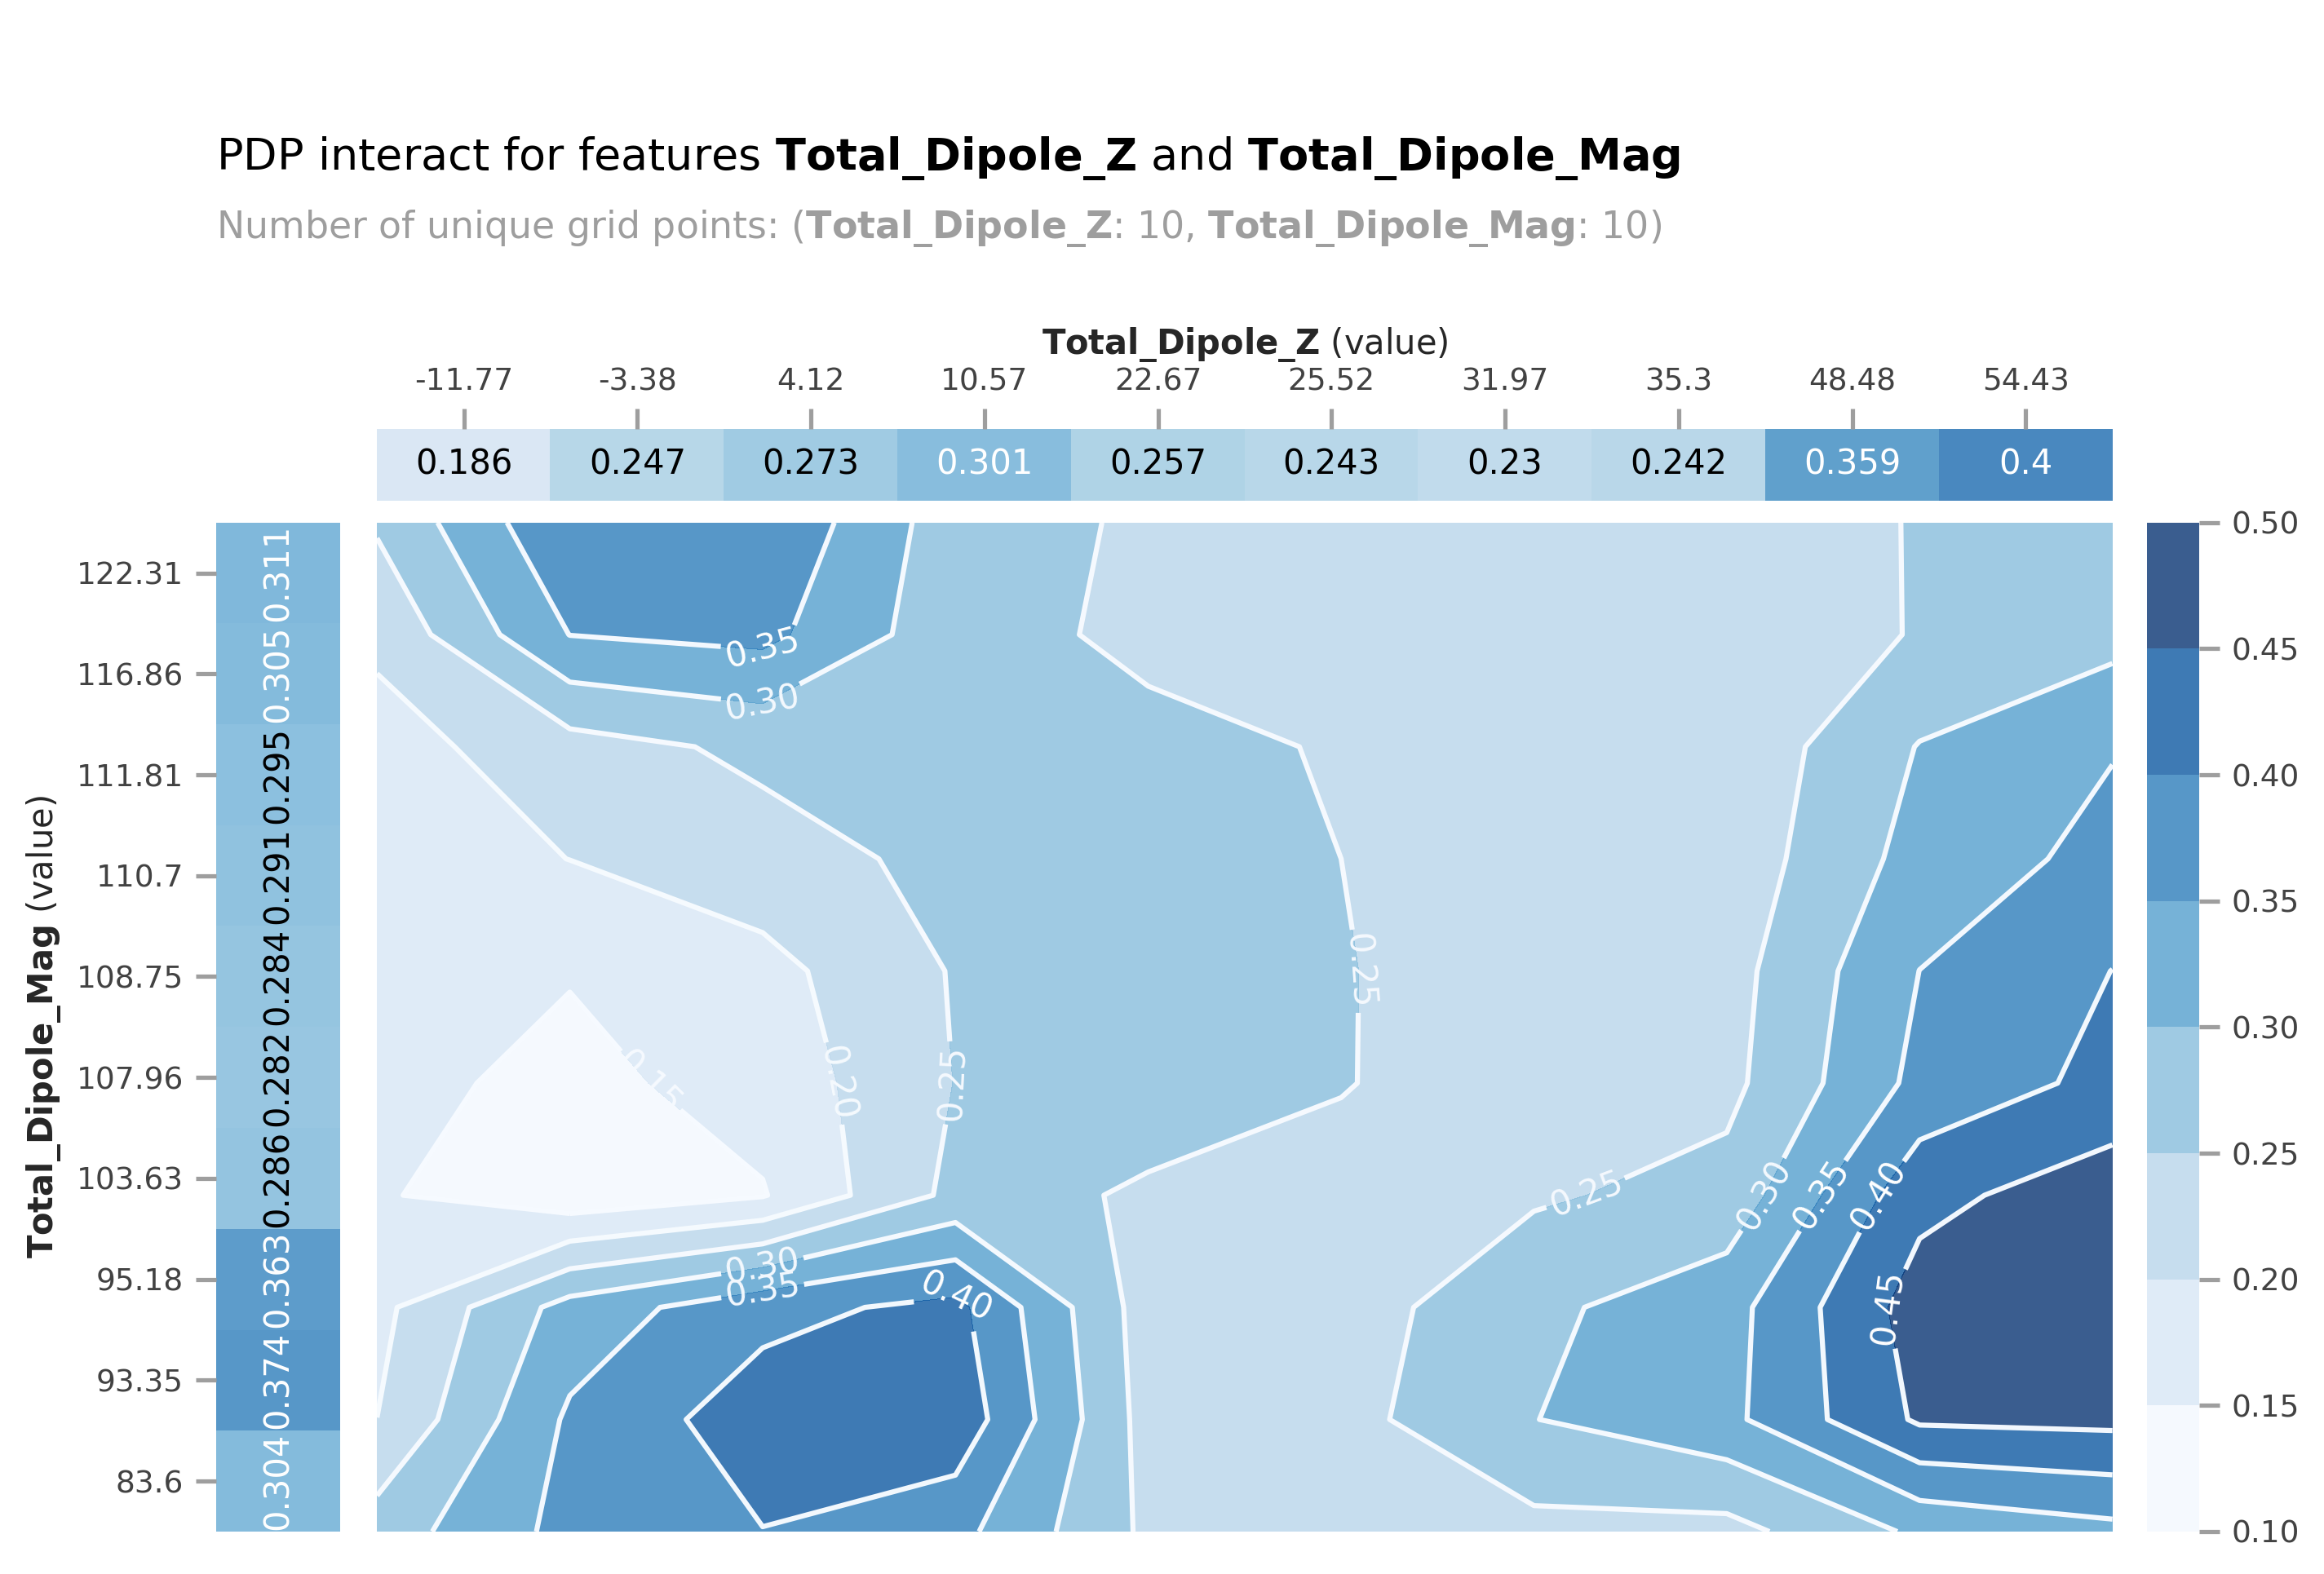

In [52]:
from pdpbox.pdp import PDPInteract
import matplotlib.pyplot as plt

# Suppose inter2 is your PDPInteract object
fig, axes = inter2.plot(
    plot_type="contour",
    to_bins=True,
    plot_pdp=True,
    show_percentile=False,
    which_classes=None,
    figsize=(10, 8),
    dpi=300,
    engine="matplotlib"
)

# Collect all axes objects from the dictionary
all_axes = []
for val in axes.values():
    if isinstance(val, list):
        all_axes.extend(val)
    else:
        all_axes.append(val)

# Apply viridis to all axes
for ax in all_axes:
    # Apply colormap to contour plots
    if hasattr(ax, 'collections'):
        for collection in ax.collections:
            collection.set_cmap("Blues")  # viridis color map

    # Apply colormap to images (marginal bars)
    if hasattr(ax, 'images'):
        for im in ax.images:
            im.set_cmap("viridis")

    # Set bold and larger font for axes and titles
    if hasattr(ax, 'title'):
        ax.title.set_fontsize(14)
        ax.title.set_fontweight("bold")
    if hasattr(ax, 'xaxis'):
        ax.xaxis.label.set_fontsize(14)
        ax.xaxis.label.set_fontweight("bold")
    if hasattr(ax, 'yaxis'):
        ax.yaxis.label.set_fontsize(14)
        ax.yaxis.label.set_fontweight("bold")
    if hasattr(ax, 'tick_params'):
        ax.tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()

# **Histogram Scatter**

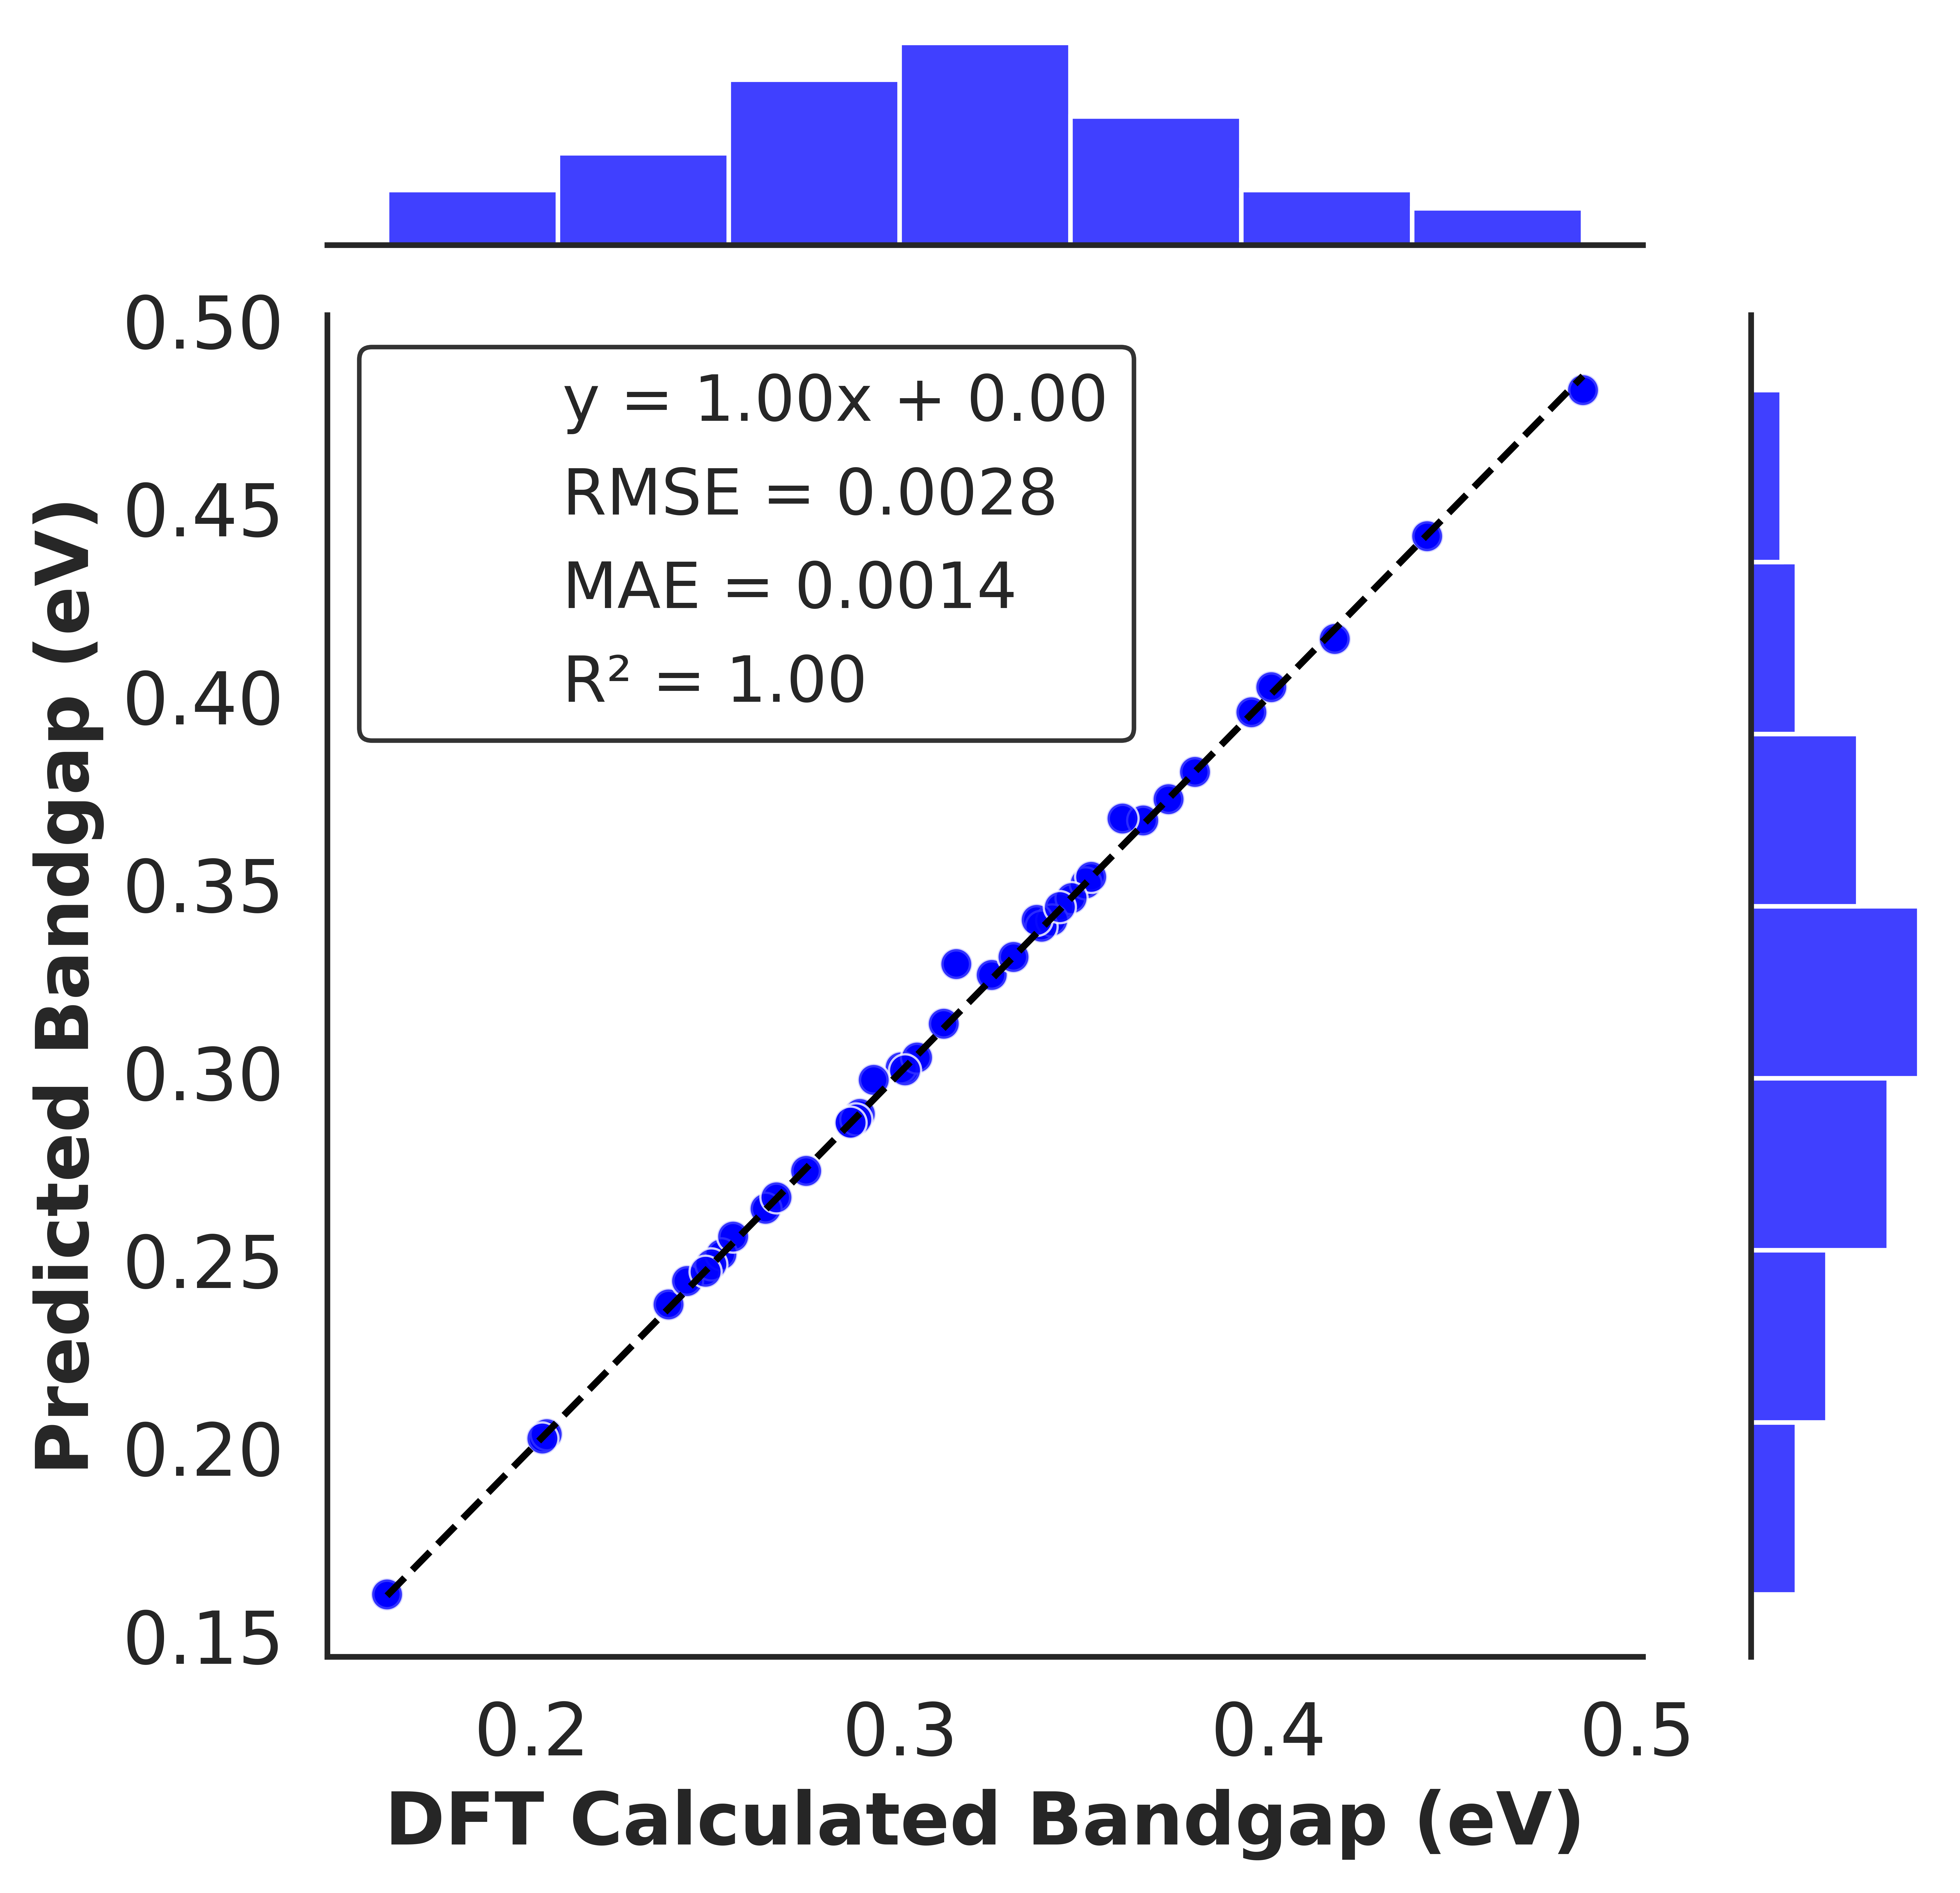

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

sns.set(style="white", color_codes=True)
GPR_pred  = GPR_model.predict(x_test)

# Flatten data
y_test_vals = y_test.values.flatten() if hasattr(y_test, 'values') else y_test.flatten()
GPR_pred_vals = GPR_pred.flatten()

# Fit linear regression y = mx + c
X = y_test_vals.reshape(-1, 1)
y = GPR_pred_vals
linreg = LinearRegression()
linreg.fit(X, y)
m = linreg.coef_[0]
c = linreg.intercept_

# Correct metrics
rmse = math.sqrt(mean_squared_error(y_test_vals, GPR_pred_vals))
mae  = mean_absolute_error(y_test_vals, GPR_pred_vals)
r2   = r2_score(y_test_vals, GPR_pred_vals)

# Plot scatter
g = sns.jointplot(x=y_test_vals, y=GPR_pred_vals, kind="scatter",
                  color="blue", space=0, height=6)
g.plot_joint(plt.scatter, color="blue", edgecolor="white",
             s=50, linewidth=0.5, alpha=0.8)

# Diagonal line
lower_limit = min(y_test_vals.min(), GPR_pred_vals.min())
upper_limit = max(y_test_vals.max(), GPR_pred_vals.max())
x_vals = np.array([lower_limit, upper_limit])
g.ax_joint.plot(x_vals, x_vals, linestyle='--', color='black')

# Regression line
y_vals = m * x_vals + c
#g.ax_joint.plot(x_vals, y_vals, linestyle='-', color='red')

# Equation formatting
if abs(c) < 1e-6:
    equation_text = f"y = {m:.2f}x"
elif c > 0:
    equation_text = f"y = {m:.2f}x + {c:.2f}"
else:
    equation_text = f"y = {m:.2f}x - {abs(c):.2f}"

# ✅ Round metrics to 2 decimals
rmse_text = f"RMSE = {rmse:.4f}"
mae_text  = f"MAE = {mae:.4f}"
r2_text   = f"R² = {r2:.2f}"

# Legend
handles = [
    plt.Line2D([], [], linestyle='', label=equation_text),
    plt.Line2D([], [], linestyle='', label=rmse_text),
    plt.Line2D([], [], linestyle='', label=mae_text),
    plt.Line2D([], [], linestyle='', label=r2_text)
]

g.ax_joint.legend(handles=handles, fontsize=14, loc='upper left',
                  edgecolor='black', facecolor='white', frameon=True)

# Labels and styling
g.set_axis_labels("DFT Calculated Bandgap (eV)", "Predicted Bandgap (eV)",
                  fontsize=16, weight='bold')

g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)

# Ticks
g.ax_joint.tick_params(axis='both', which='major', labelsize=16, width=1.5)
g.ax_marg_x.tick_params(axis='x', labelsize=16)
g.ax_marg_y.tick_params(axis='y', labelsize=16)

g.ax_joint.grid(False)

plt.show()


In [39]:
x = pd.concat([x_train, x_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)
train_sizes = [0.9,0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50]
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
estimator = GPR_model,
X = x,
y = y, train_sizes = train_sizes, cv = 10,
scoring = 'neg_mean_squared_error')

/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning:

In [40]:
rmse_train = np.sqrt(-train_scores)   # (n_sizes, n_folds)
rmse_test  = np.sqrt(-test_scores)
rmse_train_mean = rmse_train.mean(axis=1)
rmse_train_std  = rmse_train.std(axis=1)
rmse_test_mean  = rmse_test.mean(axis=1)
rmse_test_std   = rmse_test.std(axis=1)

## **Learning Curve**

In [41]:
import matplotlib.pyplot as plt

# Plotting Learning Curves for RMSE
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, rmse_train_mean, marker='D', markersize=11,
         label="Training RMSE", color='red', linewidth=2)
plt.plot(train_sizes, rmse_test_mean, marker='D', markersize=11,
         label="Test RMSE", color='blue', linewidth=2)

# Axis labels
plt.xlabel('Training set size', fontweight='bold', fontsize=14)
plt.ylabel('RMSE', fontweight='bold', fontsize=14)

# Tick styling
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')

# Legend
plt.legend(fontsize=14, edgecolor='black')

# Grid and border styling
plt.grid(True)
plt.rcParams['font.size'] = 18
plt.rcParams['figure.dpi'] = 1200
plt.rcParams['axes.linewidth'] = 1
plt.rc('axes', edgecolor='black')

# Show the plot
plt.tight_layout()
plt.show()


# **10-fold cross validation**

In [42]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score
import numpy as np
#GPR= GaussianProcessRegressor(kernel=kernel, alpha=1e-6, random_state=42)
# Define the model
#KRR_model = KernelRidge(alpha=10, gamma=0.001, kernel='poly')

# 10-fold CV: MAE
mae_scores = cross_val_score(GPR_model, x_train, y_train,
                             scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)
GPR_mae_cv = -mae_scores
average_mae = GPR_mae_cv.mean()

# 10-fold CV: RMSE (use neg_mean_squared_error, then sqrt)
mse_scores = cross_val_score(XGBR_model, x_train, y_train,
                             scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
GPR_rmse_cv = np.sqrt(-mse_scores)
average_rmse = GPR_rmse_cv.mean()

# 10-fold CV: R²
r2_scores = cross_val_score(XGBR_model, x_train, y_train,
                            scoring='r2', cv=10, n_jobs=-1)
average_r2 = r2_scores.mean()

# Output
print("10-Fold MAE (each fold):", np.round(GPR_mae_cv, 4))
print("Average MAE:", round(average_mae, 4))

print("\n10-Fold RMSE (each fold):", np.round(GPR_mae_cv, 4))
print("Average RMSE:", round(average_rmse, 4))

print("\n10-Fold R² scores:", np.round(r2_scores, 4))
print("Average R² Score:", round(average_r2, 4))


10-Fold MAE (each fold): [0.0014 0.0101 0.0032 0.0043 0.0046 0.0037 0.0028 0.0018 0.0134 0.0023]
Average MAE: 0.0048

10-Fold RMSE (each fold): [0.0014 0.0101 0.0032 0.0043 0.0046 0.0037 0.0028 0.0018 0.0134 0.0023]
Average RMSE: 0.0227

10-Fold R² scores: [0.8472 0.9076 0.8857 0.8771 0.9696 0.8704 0.7275 0.8663 0.8435 0.9322]
Average R² Score: 0.8727


# **Permutation Feature Importance**

In [43]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm

# ---- Compute permutation importance for GPR ----
result = permutation_importance(
   GPR_model,      # ← changed from KRR_model
    x_test,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

importances = result.importances_mean
stds = result.importances_std

# Filter features with positive importance (optional threshold)
threshold = 1e-4
positive_idx = importances > threshold
importances_pos = importances[positive_idx]
stds_pos = stds[positive_idx]
features_pos = x_test.columns[positive_idx]

# Sort by descending importance
sorted_idx = np.argsort(importances_pos)[::-1]
importances_pos = importances_pos[sorted_idx]
stds_pos = stds_pos[sorted_idx]
features_pos = features_pos[sorted_idx]

# Select top 20
top_n = 20
importances_top = importances_pos[:top_n]
features_top = features_pos[:top_n]

# Percentage contribution
total_importance = importances_top.sum()
percent_contrib = (importances_top / total_importance) * 100

# Color mapping (viridis)
norm = plt.Normalize(importances_top.min(), importances_top.max())
colors = cm.viridis(norm(importances_top))

# ---- Plot ----
plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(importances_top)),
               importances_top,
               color=colors,
               edgecolor='black')

plt.xticks(range(len(importances_top)),
           features_top,
           rotation=45,
           ha='right',
           fontsize=20,weight='bold')

plt.yticks(fontsize=20,weight='bold')

plt.ylabel("Permutation Importance", fontsize=20, fontweight='bold')

# Add percentage labels
for bar, pct in zip(bars, percent_contrib):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f'{pct:.1f}%',
             ha='center',
             va='bottom',
             fontsize=14,
             fontweight='bold')

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

# **SHAP INTERPRETATIONS**

In [4]:
! pip install shap

In [5]:
import shap
import pandas as pd
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

#**SHAP SUMMARY BAR PLOT**

  0%|          | 0/40 [00:00<?, ?it/s]

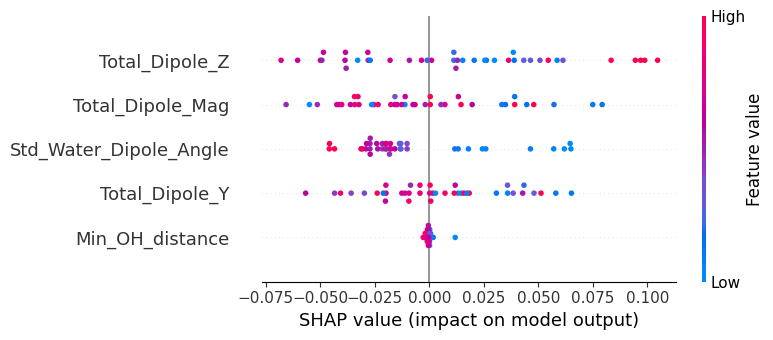

In [6]:
import shap

# Use the entire training set as background
background = x_train  # shape: (368, n_features)

# Create a SHAP KernelExplainer
explainer = shap.KernelExplainer(GPR_model.predict, background)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(x_test)

# Visualize the results
shap.summary_plot(shap_values, x_test)


# **SHAP SUMMARY PLOT WITH PRECENTAGE**

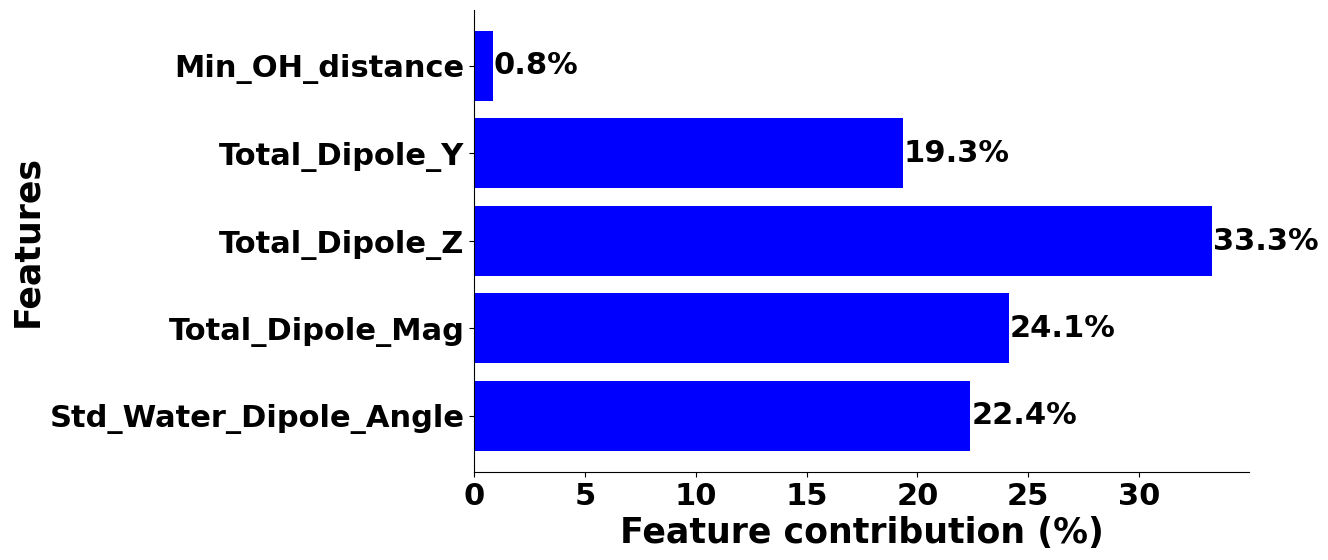

In [9]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# Compute mean absolute SHAP values
shap_values_mean = np.abs(shap_values).mean(axis=0)
feature_names = x_train.columns

# Convert to percentage
shap_percent = 100 * shap_values_mean / shap_values_mean.sum()

# Create bar plot
plt.figure(figsize=(10,6))
bars = plt.barh(feature_names, shap_percent, color='blue')

# Add text labels (percentage) on top of bars
for bar, percent in zip(bars, shap_percent):
    plt.text(bar.get_width() + 0.03, bar.get_y() + bar.get_height()/2,
             f'{percent:.1f}%', va='center', fontsize=22, fontweight='bold')

plt.xlabel("Feature contribution (%)", fontsize=25, fontweight='bold')
plt.ylabel("Features", fontsize=25, fontweight='bold')
plt.xticks(fontsize=22, fontweight='bold', color='black')
plt.yticks(fontsize=22, fontweight='bold', color='black')
plt.gca().invert_yaxis()  # highest on top

# Remove top and right axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


# **SHAP BEESWARM PLOT**

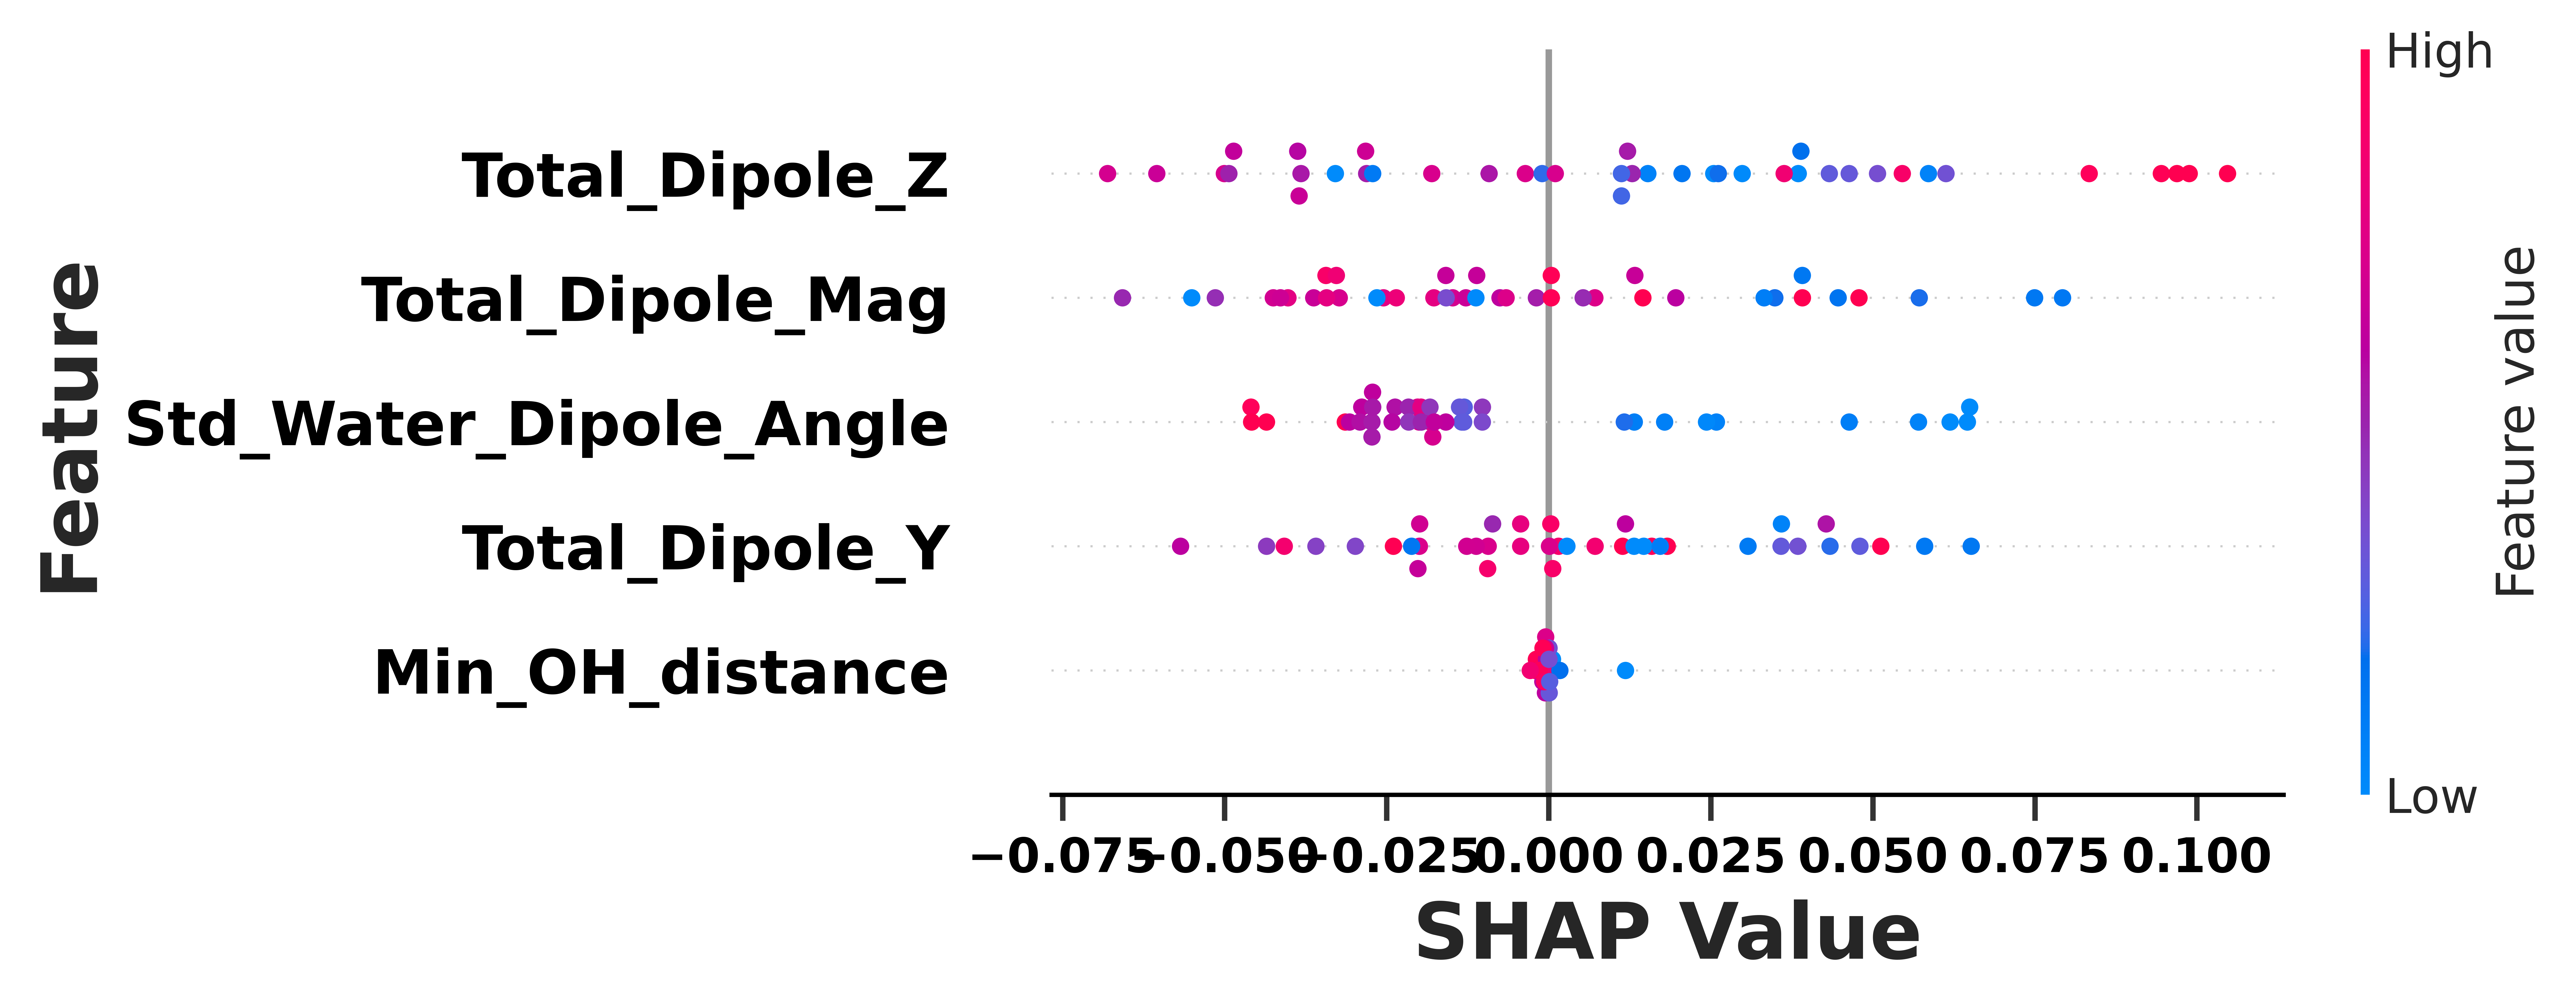

In [50]:
import matplotlib.pyplot as plt

shap.summary_plot(shap_values, x_test, feature_names=x_test.columns, show=False)

plt.xticks(fontsize=11, color='black', fontweight='bold')
plt.yticks(fontsize=14, color='black', fontweight='bold')
plt.xlabel("SHAP Value", fontsize=18, fontweight='bold')
plt.ylabel("Feature", fontsize=18, fontweight='bold')
plt.show()